# **Assignment Q1**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
N = 7624
adjacency_matrix = np.zeros((N, N), dtype=int)
edges = []

with open("C://Users//dhvan//Downloads//NetworkScience//Assignment1//undirected_graph//lastfm_asia_edges.csv", "r") as f:
    next(f)
    for line in f:
        src, dst = map(int, line.strip().split(','))
        adjacency_matrix[src, dst] = 1
        adjacency_matrix[dst, src] = 1
        edges.append((src, dst))

In [23]:
# Print the adjacency matrix (small portion for demonstration)
print("Adjacency Matrix:")
print(adjacency_matrix[:5, :5])

# Print the edge list (first few edges for demonstration)
print("\nEdge List:")
for e in edges[:5]:
    print(f"Node {e[0]} connected to Node {e[1]}")

Adjacency Matrix:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Edge List:
Node 0 connected to Node 747
Node 1 connected to Node 4257
Node 1 connected to Node 2194
Node 1 connected to Node 580
Node 1 connected to Node 6478


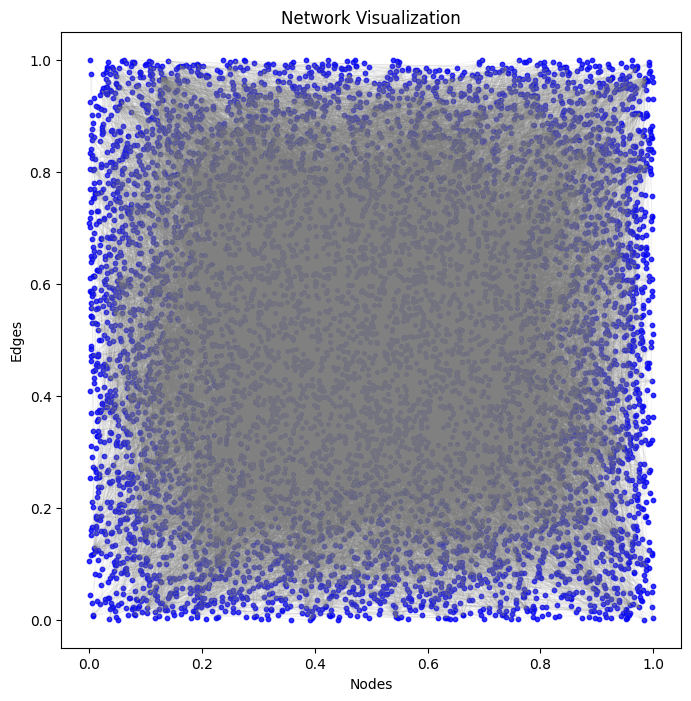

In [24]:
# (b) Visualize the network
positions = np.random.rand(N, 2)
plt.figure(figsize=(8,8))
for e in edges:
    x = [positions[e[0],0], positions[e[1],0]]
    y = [positions[e[0],1], positions[e[1],1]]
    plt.plot(x, y, color='grey', alpha=0.1, linewidth=0.5)
    
plt.scatter(positions[:,0], positions[:,1], s=10, c='blue', alpha=0.8)
plt.title("Network Visualization")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.savefig("network_visualization.png")
plt.show()

In [25]:
# (c) Compute sparseness
max_possible_edges = N * (N - 1) / 2
sparseness = len(edges) / max_possible_edges

print("\n(c) Sparseness:", sparseness)


(c) Sparseness: 0.0009568849118596328


In [26]:
# (d) Compute average degree <k>
degrees = np.sum(adjacency_matrix, axis=1)
average_degree = np.mean(degrees)

print("\n(d) Average Degree:", average_degree)


(d) Average Degree: 7.2943336831059815


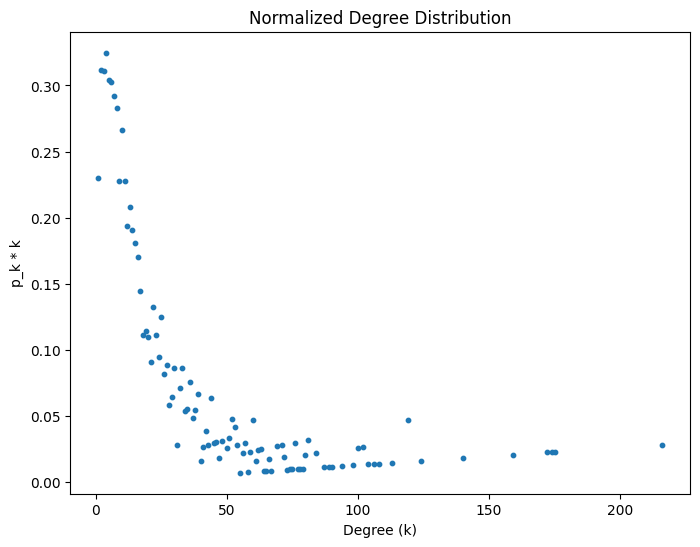

In [27]:
# (e) Compute and plot normalized degree distribution P(k)
unique_degs, counts = np.unique(degrees, return_counts=True)
p_k = counts / float(N)
scaled_pk = unique_degs * p_k

plt.figure(figsize=(8, 6))
plt.scatter(unique_degs, scaled_pk, s=10)
plt.title("Normalized Degree Distribution")
plt.xlabel("Degree (k)")
plt.ylabel("p_k * k")
plt.savefig("degree_distribution.png")
plt.show()

In [28]:
# (f) Compute Average Path Length using BFS and plot average path length distribution
adj_list = [[] for _ in range(N)]
for (i, j) in edges:
    adj_list[i].append(j)
    adj_list[j].append(i)

def bfs_shortest_paths(start, adj_list):
    dist = [-1]*N
    dist[start] = 0
    queue = deque([start])
    while queue:
        curr = queue.popleft()
        for neigh in adj_list[curr]:
            if dist[neigh] == -1:
                dist[neigh] = dist[curr] + 1
                queue.append(neigh)
    return dist

avg_path_lengths = []
for node in range(N):
    dists = bfs_shortest_paths(node, adj_list)
    reachable_dists = [d for d in dists if d >= 0]
    avg_dist = sum(reachable_dists)/len(reachable_dists)
    avg_path_lengths.append(avg_dist)

# Compute average path lengths
overall_avg_path = sum(avg_path_lengths)/N
print("\n(f) Average Path Length:", overall_avg_path)


(f) Average Path Length: 5.231550983859452


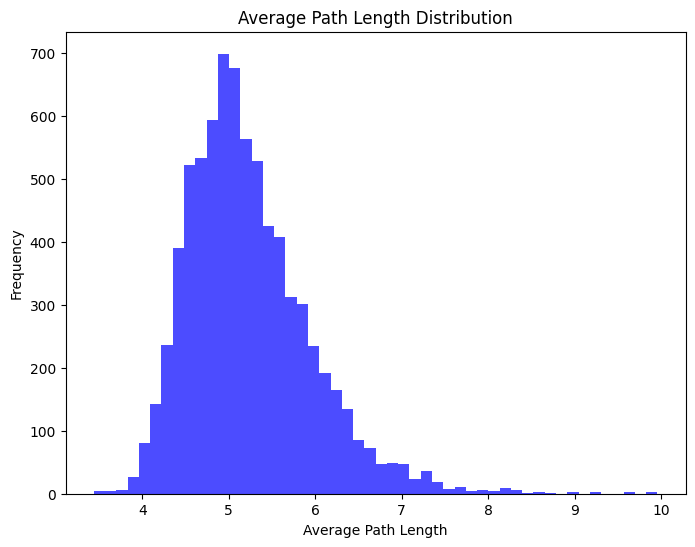

In [29]:
# Plot average path length distribution
plt.figure(figsize=(8, 6))
plt.hist(avg_path_lengths, bins=50, color='blue', alpha=0.7)
plt.title("Average Path Length Distribution")
plt.xlabel("Average Path Length")
plt.ylabel("Frequency")
plt.savefig("average_path_length.png")
plt.show()


(g) Average Clustering Coefficient: 0.219418424327086


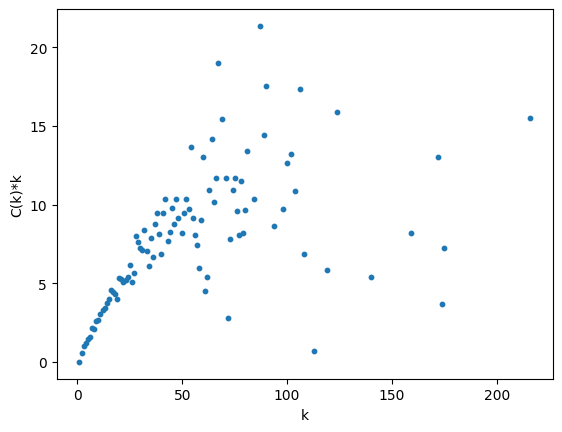

In [30]:
# (g) Compute Average Clustering Coefficient
degrees = adjacency_matrix.sum(axis=1)
clustering_coeffs = []

for i in range(N):
    k = degrees[i]
    if k < 2:
        clustering_coeffs.append(0)
    else:
        neighbors = np.where(adjacency_matrix[i] == 1)[0]
        sub_edges = 0
        for n1 in neighbors:
            for n2 in neighbors:
                if adjacency_matrix[n1, n2] == 1:
                    sub_edges += 1
        # Each edge counted twice
        clustering_coeffs.append(sub_edges/(k*(k-1)))

clustering_coeffs = np.array(clustering_coeffs)
average_cc = np.mean(clustering_coeffs)
print("\n(g) Average Clustering Coefficient:", average_cc)

# Plot C(k) * k distribution
unique_degs = np.unique(degrees)
Ck = [clustering_coeffs[degrees==d].mean() for d in unique_degs]

plt.scatter(unique_degs, np.array(Ck)*unique_degs, s=10)
plt.xlabel('k')
plt.ylabel('C(k)*k')
plt.savefig("cc_distribution.png")
plt.show()